In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras as ks
import seaborn as sns
from PIL import Image
%matplotlib inline

2021-12-21 14:13:44.583093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-21 14:13:44.583115: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
inputpath = '../../Data/CleanedImages/'
featurespath = '../../Data/Features/UnusedFeatures/'

In [ ]:
nb_images = 458

# Image processing

In [ ]:
im = Image.open(inputpath+str(0)+'.jpg')
print(list(im.getdata())[590])

### Modify contrast

This allows to sharpen the differences between colors and brightness, it did not prove succesful overall.

Reference image:


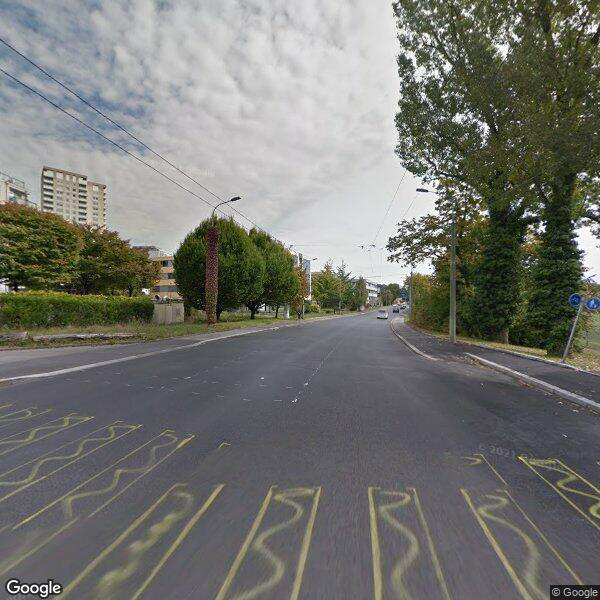

In [ ]:
def change_contrast(img, level):
    """ Contrast an image with the given level (FOUND ONLINE)
        INPUT:
            - (array) img: image to contrast
            - (int) level: contrast level
        OUTPUT:
            - the contrasted image
    """
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

print("Reference image:")
change_contrast(im,0)

Contrasted Image:


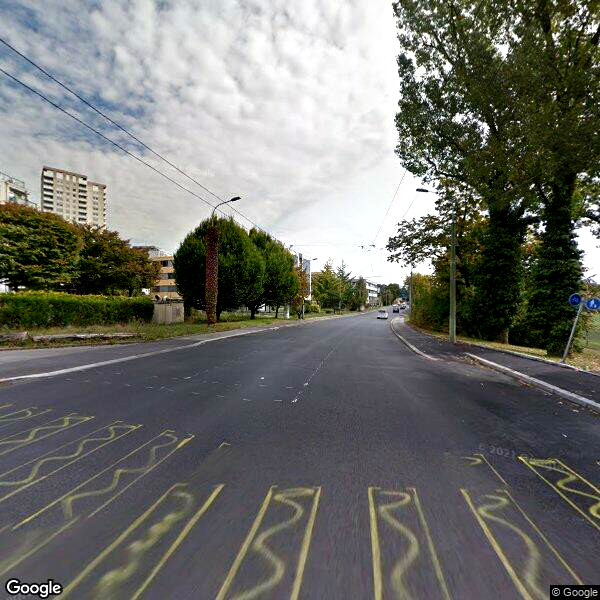

In [ ]:
contrast_level = 40
print("Contrasted Image:")
change_contrast(im, contrast_level)

In [ ]:
#Contrast images
def contrast_images(level):
    """ Contrast all the images (from 0.jpg to 457.jpg) according to <level>
        INPUT:
            - (int) level: contrasting level
        OUTPUT:
            - (List) images: the contrasted images
    """
    images = []
    for k in range(nb_images):
        img = Image.open(inputpath+str(k)+'.jpg')
        images.append(change_contrast(img, level))

    return images


### Get Pixels colors (tune thresholds)

A simpler form of image segmentation. We look at each pixel and check whether its RGB values are above/below certain thresholds, then count their total number.

In [ ]:
def get_info_images(contrast_level, thresSup, thresInf, thresWhite):
    """ Get informations on images by looking at color thresholds for each pixel.
        INPUT:
            - (int) contrast_level: contrast level
            - (int) thresSup: the minimum value for a pixel to be considered of the color (e.g Red)
            - (int) thresInf: the maximum value for a pixel to NOT be considered of the color (e.g Blue)
            - (int) thresWhite: the minimum value for all channels for a pixel to be considered white
    """

    #First contrast the images
    print("Contrasting images...")
    images = contrast_images(contrast_level)
    print("Images contrasted, now starting analysis...")

    #Then look at pixel informations
    green_pix = []
    blue_pix = []
    white_pix = []

    #Go through every image
    for k in range(nb_images):
        
        print('Image',k)
        
        img = images[k]

        green = 0
        blue = 0
        white = 0

        #For each pixel in the image, check if it is of a give color according to the defined thresholds
        for pixel in img.getdata():
            if ((pixel[0] < thresInf) & (pixel[1] > thresSup) & (pixel[2] < thresInf)): # g > thresSup and r,b < thresInf
                green += 1
            elif ((pixel[0] < thresInf) & (pixel[1] < thresInf) & (pixel[2] > thresSup)): # b > thresSup and r,g < thresInf
                blue += 1
            elif ((pixel[0] > thresWhite) & (pixel[1] > thresWhite) & (pixel[2] > thresWhite)): # b,r,g > thresWhite
                white += 1
                
        print('green = ' + str(green)+', blue = '+str(blue)+', white = '+str(white))
        green_pix.append([k,green])
        blue_pix.append([k,blue])
        white_pix.append([k,white])

    # Create 3 dataframes to store the pixel counts
    df_green_pix = pd.DataFrame(green_pix, columns=['Image number','Green_pix'])
    df_blue_pix = pd.DataFrame(blue_pix, columns=['Image number','Blue_pix'])
    df_white_pix = pd.DataFrame(white_pix, columns=['Image number','White_pix'])

    # Export the dataframes to csv to avoid regenerating them every time
    file_green = 'df_green_pix_inf' + str(thresInf) + '_sup' + str(thresSup) + '_contrast_' + str(contrast_level) + '.csv'
    file_blue = 'df_blue_pix_inf' + str(thresInf) + '_sup' + str(thresSup) + '_contrast_' + str(contrast_level) + '.csv'
    file_white= 'df_white_pix_thres' + str(thresWhite) + '_contrast_' + str(contrast_level) + '.csv'
    
    df_green_pix.to_csv(featurespath + file_green, index=False)
    df_blue_pix.to_csv(featurespath + file_blue, index=False)
    df_white_pix.to_csv(featurespath + file_white, index=False)

In [ ]:
contrast_level = 40
thresSup = 130
thresInf = 120
thresWhite = 235

In [ ]:
get_info_images(contrast_level, thresSup, thresInf, thresWhite)

Contrasting images...
Images contrasted, now starting analysis...
Image 0
green = 46, blue = 373, white = 33116
Image 1
green = 180, blue = 178, white = 15609
Image 2
green = 90, blue = 66, white = 44957
Image 3
green = 8, blue = 2714, white = 40698
Image 4
green = 43, blue = 164, white = 36268
Image 5
green = 3448, blue = 295, white = 14795
Image 6
green = 95, blue = 78, white = 15784
Image 7
green = 635, blue = 161, white = 6523
Image 8
green = 2461, blue = 287, white = 10073
Image 9
green = 8, blue = 138, white = 36012
Image 10
green = 81, blue = 18634, white = 21433
Image 11
green = 122, blue = 26, white = 6476
Image 12
green = 422, blue = 381, white = 4571
Image 13
green = 1964, blue = 535, white = 5849
Image 14
green = 264, blue = 63, white = 12838
Image 15
green = 1826, blue = 229, white = 28066
Image 16
green = 443, blue = 4546, white = 45818
Image 17
green = 1485, blue = 47, white = 6315
Image 18
green = 33, blue = 62, white = 16250
Image 19
green = 250, blue = 3051, white = 1